In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 : https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erroerror ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-mae-rmse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62
![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
- https://www.mql5.com/ko/articles/11200

In [2]:
# 섭씨온도(input)를 화씨온도(taget data=종속변수)를 출력
def c_to_f(c):
    return c * 1.8 + 32

In [3]:
input_c = int(input('섭시 온도는?'))
print('화씨돈도는', c_to_f(input_c))

섭시 온도는?10
화씨돈도는 50.0


# 2. 딥러닝/머신러닝 프로그램 방식
- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터(학습데이터셋), 검증데이터셋, 시험데이터셋
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습(훈련, 검증데이터셋)
- 6. 모델 평가(시험데이터셋)
- 7. 모델 저장/사용(입력값을 주어지면 예측값을 받기)
## 2.1 노이즈가 없는 데이터 실습

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [7]:
# 1. 데이터 확보(생성)
data_C = np.arange(100)
data_C # input데이터(독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
data_F = c_to_f(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [ ]:
# 2. 데이터 전처리 : 스케일 조정(컴퓨터에게 학습시키기 위해 정규화/표준화 : 전체의 편차를 비슷하게)

In [11]:
scaled_data_C = data_C/100
scaled_data_F = data_F/100
print('독립변수 :', scaled_data_C)
print('타겟변수 :', scaled_data_F)

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [12]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Input, Dense # 입력값과 출럭값으로 layer층 지정
model = Sequential()
model.add(Input(shape=(1,))) # 입력(독립)변수의 shape
model.add(Dense(1)) # 타겟(종속, 출력)변수의 갯수
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# 4. 모델 학습 과정 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
#                  손실함수           옵티마이저           평가지표

In [14]:
# 학습전 예측
model.predict(np.array([[0],[0.01]]))

1/1 [==============================] - 0s 178ms/step


array([[0.        ],
       [0.00568716]], dtype=float32)

In [15]:
# 학습전 모델 저장
model.save('model/before_learning.h5')

In [16]:
# 5. 모델 학습시키기 - 셀1번만 실행
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)
             # 독립변수(훈련data), 타겟변수(훈련data), 학습횟수, 학습시 출력여부

Epoch 1/1000
4/4 - 0s - loss: 0.9808 - mae: 0.9248 - 334ms/epoch - 83ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.9579 - mae: 0.9130 - 4ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.9424 - mae: 0.9053 - 6ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.9290 - mae: 0.8982 - 4ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.9172 - mae: 0.8921 - 8ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.9052 - mae: 0.8859 - 4ms/epoch - 1ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.8929 - mae: 0.8795 - 5ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.8809 - mae: 0.8730 - 4ms/epoch - 1000us/step
Epoch 9/1000
4/4 - 0s - loss: 0.8709 - mae: 0.8677 - 5ms/epoch - 1ms/step
Epoch 10/1000
4/4 - 0s - loss: 0.8604 - mae: 0.8620 - 9ms/epoch - 2ms/step
Epoch 11/1000
4/4 - 0s - loss: 0.8494 - mae: 0.8560 - 4ms/epoch - 1ms/step
Epoch 12/1000
4/4 - 0s - loss: 0.8383 - mae: 0.8501 - 5ms/epoch - 1ms/step
Epoch 13/1000
4/4 - 0s - loss: 0.8275 - mae: 0.8441 - 4ms/epoch - 1ms/step
Epoch 14/1000
4/4 - 0s - los

Epoch 110/1000
4/4 - 0s - loss: 0.1366 - mae: 0.3039 - 5ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 0.1328 - mae: 0.2993 - 4ms/epoch - 1ms/step
Epoch 112/1000
4/4 - 0s - loss: 0.1291 - mae: 0.2947 - 7ms/epoch - 2ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.1251 - mae: 0.2898 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.1216 - mae: 0.2856 - 6ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.1182 - mae: 0.2814 - 4ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 0.1148 - mae: 0.2772 - 4ms/epoch - 1ms/step
Epoch 117/1000
4/4 - 0s - loss: 0.1116 - mae: 0.2732 - 7ms/epoch - 2ms/step
Epoch 118/1000
4/4 - 0s - loss: 0.1082 - mae: 0.2688 - 3ms/epoch - 748us/step
Epoch 119/1000
4/4 - 0s - loss: 0.1047 - mae: 0.2643 - 5ms/epoch - 1ms/step
Epoch 120/1000
4/4 - 0s - loss: 0.1018 - mae: 0.2607 - 4ms/epoch - 999us/step
Epoch 121/1000
4/4 - 0s - loss: 0.0989 - mae: 0.2567 - 3ms/epoch - 840us/step
Epoch 122/1000
4/4 - 0s - loss: 0.0959 - mae: 0.2529 - 8ms/epoch - 2ms/step
Epoch 

4/4 - 0s - loss: 0.0156 - mae: 0.1079 - 5ms/epoch - 1ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.0154 - mae: 0.1073 - 6ms/epoch - 1ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.0152 - mae: 0.1063 - 4ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0149 - mae: 0.1056 - 5ms/epoch - 1ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.0147 - mae: 0.1046 - 4ms/epoch - 935us/step
Epoch 222/1000
4/4 - 0s - loss: 0.0144 - mae: 0.1038 - 4ms/epoch - 999us/step
Epoch 223/1000
4/4 - 0s - loss: 0.0142 - mae: 0.1029 - 4ms/epoch - 1ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.0139 - mae: 0.1021 - 4ms/epoch - 914us/step
Epoch 225/1000
4/4 - 0s - loss: 0.0137 - mae: 0.1013 - 5ms/epoch - 1ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.0135 - mae: 0.1003 - 5ms/epoch - 1ms/step
Epoch 227/1000
4/4 - 0s - loss: 0.0132 - mae: 0.0994 - 6ms/epoch - 2ms/step
Epoch 228/1000
4/4 - 0s - loss: 0.0130 - mae: 0.0986 - 4ms/epoch - 1ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.0128 - mae: 0.0976 - 5ms/epoch - 1ms/step
Epoch 230/1000
4/4 - 

4/4 - 0s - loss: 7.0347e-04 - mae: 0.0229 - 5ms/epoch - 1ms/step
Epoch 325/1000
4/4 - 0s - loss: 6.5927e-04 - mae: 0.0221 - 11ms/epoch - 3ms/step
Epoch 326/1000
4/4 - 0s - loss: 6.1539e-04 - mae: 0.0214 - 11ms/epoch - 3ms/step
Epoch 327/1000
4/4 - 0s - loss: 5.6858e-04 - mae: 0.0206 - 5ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 5.2657e-04 - mae: 0.0198 - 5ms/epoch - 1ms/step
Epoch 329/1000
4/4 - 0s - loss: 4.8689e-04 - mae: 0.0191 - 4ms/epoch - 995us/step
Epoch 330/1000
4/4 - 0s - loss: 4.5093e-04 - mae: 0.0183 - 4ms/epoch - 1ms/step
Epoch 331/1000
4/4 - 0s - loss: 4.0971e-04 - mae: 0.0175 - 7ms/epoch - 2ms/step
Epoch 332/1000
4/4 - 0s - loss: 3.6905e-04 - mae: 0.0166 - 5ms/epoch - 1ms/step
Epoch 333/1000
4/4 - 0s - loss: 3.3773e-04 - mae: 0.0160 - 6ms/epoch - 1ms/step
Epoch 334/1000
4/4 - 0s - loss: 3.0661e-04 - mae: 0.0151 - 4ms/epoch - 1ms/step
Epoch 335/1000
4/4 - 0s - loss: 2.7480e-04 - mae: 0.0143 - 4ms/epoch - 1ms/step
Epoch 336/1000
4/4 - 0s - loss: 2.4544e-04 - mae: 0

Epoch 424/1000
4/4 - 0s - loss: 5.3999e-08 - mae: 2.2340e-04 - 4ms/epoch - 1000us/step
Epoch 425/1000
4/4 - 0s - loss: 9.8100e-08 - mae: 2.9628e-04 - 5ms/epoch - 1ms/step
Epoch 426/1000
4/4 - 0s - loss: 1.0051e-06 - mae: 9.7608e-04 - 4ms/epoch - 925us/step
Epoch 427/1000
4/4 - 0s - loss: 6.3294e-07 - mae: 7.7819e-04 - 6ms/epoch - 2ms/step
Epoch 428/1000
4/4 - 0s - loss: 1.4594e-07 - mae: 3.6264e-04 - 5ms/epoch - 1ms/step
Epoch 429/1000
4/4 - 0s - loss: 9.2588e-07 - mae: 9.2841e-04 - 4ms/epoch - 1ms/step
Epoch 430/1000
4/4 - 0s - loss: 2.3711e-07 - mae: 4.7561e-04 - 5ms/epoch - 1ms/step
Epoch 431/1000
4/4 - 0s - loss: 4.7182e-07 - mae: 6.6594e-04 - 4ms/epoch - 999us/step
Epoch 432/1000
4/4 - 0s - loss: 1.2505e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 433/1000
4/4 - 0s - loss: 2.7925e-07 - mae: 5.1626e-04 - 4ms/epoch - 1ms/step
Epoch 434/1000
4/4 - 0s - loss: 7.6900e-08 - mae: 2.6152e-04 - 4ms/epoch - 1ms/step
Epoch 435/1000
4/4 - 0s - loss: 1.0649e-06 - mae: 0.0010 - 4ms/epoch - 1m

Epoch 522/1000
4/4 - 0s - loss: 6.2558e-07 - mae: 7.7122e-04 - 4ms/epoch - 1ms/step
Epoch 523/1000
4/4 - 0s - loss: 8.3036e-07 - mae: 8.8188e-04 - 4ms/epoch - 1000us/step
Epoch 524/1000
4/4 - 0s - loss: 3.1186e-07 - mae: 5.4596e-04 - 4ms/epoch - 1ms/step
Epoch 525/1000
4/4 - 0s - loss: 5.7979e-07 - mae: 7.4460e-04 - 10ms/epoch - 3ms/step
Epoch 526/1000
4/4 - 0s - loss: 6.5294e-07 - mae: 7.9398e-04 - 4ms/epoch - 1ms/step
Epoch 527/1000
4/4 - 0s - loss: 3.5854e-07 - mae: 5.8578e-04 - 5ms/epoch - 1ms/step
Epoch 528/1000
4/4 - 0s - loss: 8.9428e-07 - mae: 9.2783e-04 - 4ms/epoch - 1ms/step
Epoch 529/1000
4/4 - 0s - loss: 3.4782e-07 - mae: 5.7981e-04 - 4ms/epoch - 1ms/step
Epoch 530/1000
4/4 - 0s - loss: 2.1066e-07 - mae: 4.4436e-04 - 6ms/epoch - 2ms/step
Epoch 531/1000
4/4 - 0s - loss: 8.7350e-07 - mae: 8.9854e-04 - 4ms/epoch - 895us/step
Epoch 532/1000
4/4 - 0s - loss: 8.6666e-07 - mae: 8.8570e-04 - 5ms/epoch - 1ms/step
Epoch 533/1000
4/4 - 0s - loss: 2.9808e-07 - mae: 5.3468e-04 - 5ms/epo

Epoch 620/1000
4/4 - 0s - loss: 1.4572e-06 - mae: 0.0012 - 3ms/epoch - 827us/step
Epoch 621/1000
4/4 - 0s - loss: 2.2642e-07 - mae: 4.6197e-04 - 5ms/epoch - 1ms/step
Epoch 622/1000
4/4 - 0s - loss: 6.5685e-07 - mae: 7.9362e-04 - 4ms/epoch - 1000us/step
Epoch 623/1000
4/4 - 0s - loss: 3.8051e-07 - mae: 6.0110e-04 - 5ms/epoch - 1ms/step
Epoch 624/1000
4/4 - 0s - loss: 5.7701e-07 - mae: 7.3897e-04 - 6ms/epoch - 1ms/step
Epoch 625/1000
4/4 - 0s - loss: 5.2915e-07 - mae: 7.1212e-04 - 5ms/epoch - 1ms/step
Epoch 626/1000
4/4 - 0s - loss: 6.6642e-07 - mae: 8.0066e-04 - 5ms/epoch - 1ms/step
Epoch 627/1000
4/4 - 0s - loss: 5.1882e-07 - mae: 7.0273e-04 - 4ms/epoch - 998us/step
Epoch 628/1000
4/4 - 0s - loss: 7.2432e-07 - mae: 8.2442e-04 - 3ms/epoch - 806us/step
Epoch 629/1000
4/4 - 0s - loss: 3.9705e-07 - mae: 6.1755e-04 - 7ms/epoch - 2ms/step
Epoch 630/1000
4/4 - 0s - loss: 3.7438e-07 - mae: 5.9794e-04 - 4ms/epoch - 935us/step
Epoch 631/1000
4/4 - 0s - loss: 9.6684e-07 - mae: 9.5981e-04 - 4ms/ep

Epoch 718/1000
4/4 - 0s - loss: 5.5888e-07 - mae: 7.2575e-04 - 5ms/epoch - 1ms/step
Epoch 719/1000
4/4 - 0s - loss: 1.0562e-06 - mae: 9.9034e-04 - 4ms/epoch - 948us/step
Epoch 720/1000
4/4 - 0s - loss: 1.2902e-07 - mae: 3.4451e-04 - 5ms/epoch - 1ms/step
Epoch 721/1000
4/4 - 0s - loss: 1.7524e-07 - mae: 4.0310e-04 - 5ms/epoch - 1ms/step
Epoch 722/1000
4/4 - 0s - loss: 1.2300e-06 - mae: 0.0011 - 4ms/epoch - 1ms/step
Epoch 723/1000
4/4 - 0s - loss: 7.6744e-07 - mae: 8.2700e-04 - 5ms/epoch - 1ms/step
Epoch 724/1000
4/4 - 0s - loss: 3.6155e-08 - mae: 1.8375e-04 - 4ms/epoch - 998us/step
Epoch 725/1000
4/4 - 0s - loss: 2.7839e-07 - mae: 4.9389e-04 - 5ms/epoch - 1ms/step
Epoch 726/1000
4/4 - 0s - loss: 1.0877e-06 - mae: 0.0010 - 4ms/epoch - 998us/step
Epoch 727/1000
4/4 - 0s - loss: 8.3841e-07 - mae: 8.5029e-04 - 4ms/epoch - 1ms/step
Epoch 728/1000
4/4 - 0s - loss: 1.7306e-07 - mae: 4.0201e-04 - 4ms/epoch - 1ms/step
Epoch 729/1000
4/4 - 0s - loss: 4.0872e-07 - mae: 6.1660e-04 - 4ms/epoch - 1ms

Epoch 816/1000
4/4 - 0s - loss: 1.3235e-06 - mae: 0.0011 - 7ms/epoch - 2ms/step
Epoch 817/1000
4/4 - 0s - loss: 3.4218e-07 - mae: 5.6763e-04 - 4ms/epoch - 1ms/step
Epoch 818/1000
4/4 - 0s - loss: 1.5184e-07 - mae: 3.7902e-04 - 4ms/epoch - 999us/step
Epoch 819/1000
4/4 - 0s - loss: 1.1876e-06 - mae: 0.0011 - 5ms/epoch - 1ms/step
Epoch 820/1000
4/4 - 0s - loss: 5.9234e-08 - mae: 2.2655e-04 - 3ms/epoch - 752us/step
Epoch 821/1000
4/4 - 0s - loss: 1.8339e-08 - mae: 1.1606e-04 - 6ms/epoch - 1ms/step
Epoch 822/1000
4/4 - 0s - loss: 1.2797e-06 - mae: 0.0011 - 4ms/epoch - 1ms/step
Epoch 823/1000
4/4 - 0s - loss: 9.5654e-07 - mae: 8.9291e-04 - 5ms/epoch - 1ms/step
Epoch 824/1000
4/4 - 0s - loss: 1.7386e-08 - mae: 1.2656e-04 - 4ms/epoch - 973us/step
Epoch 825/1000
4/4 - 0s - loss: 1.1613e-08 - mae: 1.0068e-04 - 4ms/epoch - 1000us/step
Epoch 826/1000
4/4 - 0s - loss: 4.6753e-07 - mae: 6.1517e-04 - 7ms/epoch - 2ms/step
Epoch 827/1000
4/4 - 0s - loss: 1.6360e-06 - mae: 0.0012 - 4ms/epoch - 1ms/step

Epoch 914/1000
4/4 - 0s - loss: 4.4716e-07 - mae: 6.5522e-04 - 4ms/epoch - 1ms/step
Epoch 915/1000
4/4 - 0s - loss: 5.9437e-07 - mae: 7.5274e-04 - 5ms/epoch - 1ms/step
Epoch 916/1000
4/4 - 0s - loss: 8.7748e-07 - mae: 9.1031e-04 - 4ms/epoch - 1ms/step
Epoch 917/1000
4/4 - 0s - loss: 1.3093e-07 - mae: 3.5374e-04 - 4ms/epoch - 1000us/step
Epoch 918/1000
4/4 - 0s - loss: 4.1309e-07 - mae: 6.2149e-04 - 4ms/epoch - 1000us/step
Epoch 919/1000
4/4 - 0s - loss: 1.1163e-06 - mae: 0.0010 - 5ms/epoch - 1ms/step
Epoch 920/1000
4/4 - 0s - loss: 2.1832e-07 - mae: 4.5615e-04 - 4ms/epoch - 1ms/step
Epoch 921/1000
4/4 - 0s - loss: 4.8269e-07 - mae: 6.7626e-04 - 4ms/epoch - 1ms/step
Epoch 922/1000
4/4 - 0s - loss: 1.1749e-06 - mae: 0.0010 - 5ms/epoch - 1ms/step
Epoch 923/1000
4/4 - 0s - loss: 1.1165e-07 - mae: 3.2638e-04 - 4ms/epoch - 1000us/step
Epoch 924/1000
4/4 - 0s - loss: 8.4313e-07 - mae: 8.9972e-04 - 4ms/epoch - 930us/step
Epoch 925/1000
4/4 - 0s - loss: 5.9403e-07 - mae: 7.4577e-04 - 6ms/epoch 

In [17]:
# 6. 모델 과정 시각화
hist.history.keys()

dict_keys(['loss', 'mae'])

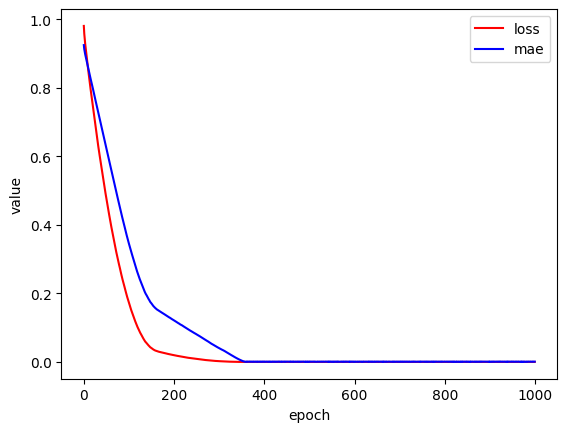

In [20]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [21]:
# 7. 모델 사용/저장
model.predict(np.array([[0],[0.01],[0.02]]))

1/1 [==============================] - 0s 18ms/step


array([[0.31931397],
       [0.33730975],
       [0.3553055 ]], dtype=float32)

In [22]:
model.save('model/after_learning.h5')

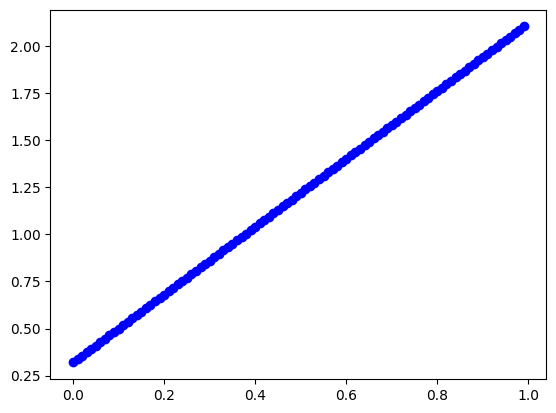

In [23]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')

In [27]:
y_hat = model.predict([scaled_data_C]) # 예측값
for h,y in zip(y_hat[::20], scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 1ms/step
[0.31931397] 0.32
[0.6792293] 0.68
[1.0391446] 1.04
[1.3990601] 1.4
[1.7589754] 1.76


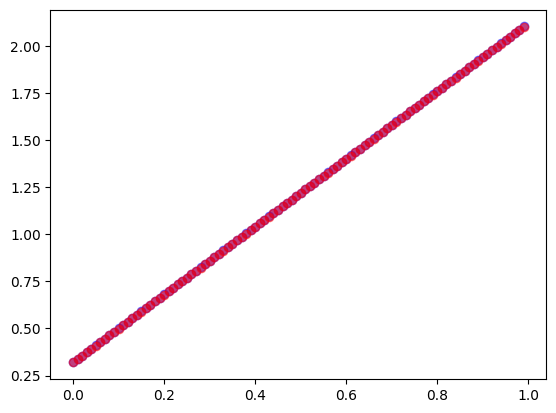

In [31]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5)
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터 실습

In [35]:
# noise : 평균0, 표준편자 0.1인 데이터 100개 배열
noise = np.random.normal(0, scale=0.1, size=100)
noised_scaled_data_F = scaled_data_F + noise
print('독립변수 :', scaled_data_C)
print('타겟변수 :', noised_scaled_data_F)

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.15019268 0.2715848  0.41105015 0.38550797 0.37341425 0.3160561
 0.40174059 0.57229149 0.61226079 0.34751715 0.59110585 0.62697517
 0.58130476 0.65751883 0.56047823 0.64282469 0.72775958 0.48738344
 0.6339807  0.66368171 0.70045377 0.55246921 0.63803466 0.73943852
 0.72996176 0.62704977 0.8505372  0.80676437 0.75843147 0.76932413
 0.71412057 0.88007811 0.99325462 0.97138484 0.77146317 0.83472518
 1.04941567 0.89183461 0.94359894 1.05609426 1.11667439 0.98855368
 1.116356

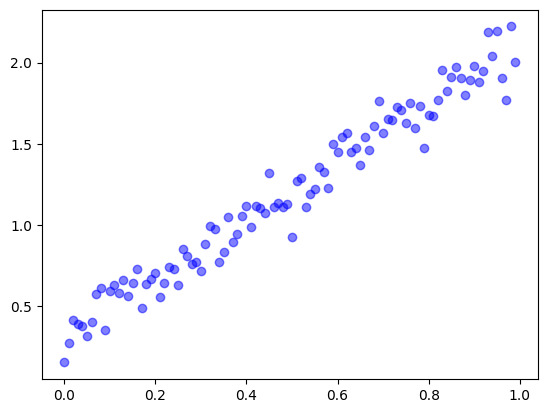

In [36]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='b', alpha=0.5)
plt.show()

In [68]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,)))
print(model2.summary())
# 5. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# 6. 학습시키기
hist = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 - 0s - loss: 2.0862 - mae: 1.3147 - 232ms/epoch - 58ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.0567 - mae: 1.3045 - 5ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 2.0318 - mae: 1.2957 - 9ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 2.0113 - mae: 1.2883 - 4ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 1.9933 - mae: 1.2819 - 6ms/epoch - 2ms/step
Epoch 6/1000
4/4 - 0s - loss: 1.9766 - mae: 1.2758 - 3ms/epoch - 751us/step
Epoch 7/1000
4/4 - 0s - loss: 1.9609 - mae: 1.2702 - 6ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 1.9434 - mae: 1.2639 - 4ms/epo

Epoch 103/1000
4/4 - 0s - loss: 0.7436 - mae: 0.7261 - 5ms/epoch - 1ms/step
Epoch 104/1000
4/4 - 0s - loss: 0.7338 - mae: 0.7208 - 4ms/epoch - 1ms/step
Epoch 105/1000
4/4 - 0s - loss: 0.7248 - mae: 0.7156 - 9ms/epoch - 2ms/step
Epoch 106/1000
4/4 - 0s - loss: 0.7151 - mae: 0.7101 - 4ms/epoch - 1000us/step
Epoch 107/1000
4/4 - 0s - loss: 0.7064 - mae: 0.7052 - 6ms/epoch - 1ms/step
Epoch 108/1000
4/4 - 0s - loss: 0.6969 - mae: 0.6997 - 4ms/epoch - 1ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.6889 - mae: 0.6952 - 3ms/epoch - 748us/step
Epoch 110/1000
4/4 - 0s - loss: 0.6791 - mae: 0.6894 - 4ms/epoch - 999us/step
Epoch 111/1000
4/4 - 0s - loss: 0.6719 - mae: 0.6852 - 3ms/epoch - 750us/step
Epoch 112/1000
4/4 - 0s - loss: 0.6634 - mae: 0.6802 - 4ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 0.6538 - mae: 0.6745 - 5ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.6462 - mae: 0.6700 - 6ms/epoch - 2ms/step
Epoch 115/1000
4/4 - 0s - loss: 0.6377 - mae: 0.6649 - 4ms/epoch - 998us/step
E

Epoch 210/1000
4/4 - 0s - loss: 0.1558 - mae: 0.3321 - 4ms/epoch - 999us/step
Epoch 211/1000
4/4 - 0s - loss: 0.1542 - mae: 0.3306 - 6ms/epoch - 1ms/step
Epoch 212/1000
4/4 - 0s - loss: 0.1526 - mae: 0.3291 - 3ms/epoch - 750us/step
Epoch 213/1000
4/4 - 0s - loss: 0.1513 - mae: 0.3275 - 5ms/epoch - 1ms/step
Epoch 214/1000
4/4 - 0s - loss: 0.1494 - mae: 0.3257 - 5ms/epoch - 1ms/step
Epoch 215/1000
4/4 - 0s - loss: 0.1477 - mae: 0.3239 - 3ms/epoch - 751us/step
Epoch 216/1000
4/4 - 0s - loss: 0.1463 - mae: 0.3227 - 6ms/epoch - 1ms/step
Epoch 217/1000
4/4 - 0s - loss: 0.1445 - mae: 0.3207 - 4ms/epoch - 1ms/step
Epoch 218/1000
4/4 - 0s - loss: 0.1434 - mae: 0.3196 - 4ms/epoch - 1ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.1416 - mae: 0.3179 - 5ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.1399 - mae: 0.3161 - 4ms/epoch - 1ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.1391 - mae: 0.3152 - 5ms/epoch - 1ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.1379 - mae: 0.3140 - 4ms/epoch - 1ms/step
Epoch 

Epoch 317/1000
4/4 - 0s - loss: 0.0770 - mae: 0.2394 - 4ms/epoch - 1ms/step
Epoch 318/1000
4/4 - 0s - loss: 0.0766 - mae: 0.2387 - 4ms/epoch - 1000us/step
Epoch 319/1000
4/4 - 0s - loss: 0.0763 - mae: 0.2383 - 4ms/epoch - 1000us/step
Epoch 320/1000
4/4 - 0s - loss: 0.0757 - mae: 0.2374 - 7ms/epoch - 2ms/step
Epoch 321/1000
4/4 - 0s - loss: 0.0754 - mae: 0.2368 - 4ms/epoch - 999us/step
Epoch 322/1000
4/4 - 0s - loss: 0.0751 - mae: 0.2363 - 5ms/epoch - 1ms/step
Epoch 323/1000
4/4 - 0s - loss: 0.0746 - mae: 0.2355 - 3ms/epoch - 741us/step
Epoch 324/1000
4/4 - 0s - loss: 0.0741 - mae: 0.2348 - 4ms/epoch - 1000us/step
Epoch 325/1000
4/4 - 0s - loss: 0.0738 - mae: 0.2342 - 8ms/epoch - 2ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.0734 - mae: 0.2336 - 4ms/epoch - 999us/step
Epoch 327/1000
4/4 - 0s - loss: 0.0730 - mae: 0.2330 - 5ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.0726 - mae: 0.2323 - 3ms/epoch - 764us/step
Epoch 329/1000
4/4 - 0s - loss: 0.0722 - mae: 0.2317 - 4ms/epoch - 1000

Epoch 424/1000
4/4 - 0s - loss: 0.0364 - mae: 0.1610 - 4ms/epoch - 1000us/step
Epoch 425/1000
4/4 - 0s - loss: 0.0362 - mae: 0.1603 - 4ms/epoch - 998us/step
Epoch 426/1000
4/4 - 0s - loss: 0.0360 - mae: 0.1598 - 4ms/epoch - 917us/step
Epoch 427/1000
4/4 - 0s - loss: 0.0357 - mae: 0.1592 - 5ms/epoch - 1ms/step
Epoch 428/1000
4/4 - 0s - loss: 0.0355 - mae: 0.1586 - 4ms/epoch - 962us/step
Epoch 429/1000
4/4 - 0s - loss: 0.0352 - mae: 0.1580 - 4ms/epoch - 994us/step
Epoch 430/1000
4/4 - 0s - loss: 0.0350 - mae: 0.1574 - 4ms/epoch - 1ms/step
Epoch 431/1000
4/4 - 0s - loss: 0.0348 - mae: 0.1568 - 4ms/epoch - 1ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.0344 - mae: 0.1560 - 5ms/epoch - 1ms/step
Epoch 433/1000
4/4 - 0s - loss: 0.0341 - mae: 0.1553 - 4ms/epoch - 1ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0339 - mae: 0.1546 - 4ms/epoch - 1ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0337 - mae: 0.1540 - 5ms/epoch - 1ms/step
Epoch 436/1000
4/4 - 0s - loss: 0.0334 - mae: 0.1533 - 4ms/epoch - 1ms/step
E

Epoch 531/1000
4/4 - 0s - loss: 0.0160 - mae: 0.1008 - 4ms/epoch - 1ms/step
Epoch 532/1000
4/4 - 0s - loss: 0.0158 - mae: 0.1003 - 5ms/epoch - 1ms/step
Epoch 533/1000
4/4 - 0s - loss: 0.0157 - mae: 0.1001 - 4ms/epoch - 1ms/step
Epoch 534/1000
4/4 - 0s - loss: 0.0156 - mae: 0.0997 - 4ms/epoch - 1ms/step
Epoch 535/1000
4/4 - 0s - loss: 0.0155 - mae: 0.0994 - 3ms/epoch - 751us/step
Epoch 536/1000
4/4 - 0s - loss: 0.0154 - mae: 0.0990 - 5ms/epoch - 1ms/step
Epoch 537/1000
4/4 - 0s - loss: 0.0153 - mae: 0.0986 - 5ms/epoch - 1ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0152 - mae: 0.0983 - 4ms/epoch - 1000us/step
Epoch 539/1000
4/4 - 0s - loss: 0.0150 - mae: 0.0978 - 5ms/epoch - 1ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0149 - mae: 0.0974 - 3ms/epoch - 749us/step
Epoch 541/1000
4/4 - 0s - loss: 0.0149 - mae: 0.0972 - 4ms/epoch - 998us/step
Epoch 542/1000
4/4 - 0s - loss: 0.0147 - mae: 0.0969 - 5ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0147 - mae: 0.0965 - 4ms/epoch - 1ms/step
Epo

Epoch 638/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0826 - 5ms/epoch - 1ms/step
Epoch 639/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0825 - 4ms/epoch - 1000us/step
Epoch 640/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0825 - 4ms/epoch - 1ms/step
Epoch 641/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0824 - 5ms/epoch - 1ms/step
Epoch 642/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0824 - 4ms/epoch - 1000us/step
Epoch 643/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0825 - 3ms/epoch - 750us/step
Epoch 644/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0825 - 5ms/epoch - 1ms/step
Epoch 645/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0826 - 4ms/epoch - 998us/step
Epoch 646/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0825 - 4ms/epoch - 1ms/step
Epoch 647/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0823 - 6ms/epoch - 2ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0823 - 4ms/epoch - 1ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0824 - 6ms/epoch - 2ms/step
Epoch 650/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0821 - 4ms/epoch - 1ms/step
Ep

Epoch 745/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0811 - 4ms/epoch - 1000us/step
Epoch 746/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 3ms/epoch - 750us/step
Epoch 747/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 5ms/epoch - 1ms/step
Epoch 748/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0810 - 4ms/epoch - 1ms/step
Epoch 749/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 1ms/step
Epoch 750/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 5ms/epoch - 1ms/step
Epoch 751/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 1000us/step
Epoch 752/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0810 - 4ms/epoch - 998us/step
Epoch 753/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 5ms/epoch - 1ms/step
Epoch 754/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 1000us/step
Epoch 755/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 6ms/epoch - 1ms/step
Epoch 756/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0809 - 5ms/epoch - 1ms/step
Epoch 757/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0811 - 3ms/epoch - 777us/st

Epoch 852/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 4ms/epoch - 997us/step
Epoch 853/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 4ms/epoch - 994us/step
Epoch 854/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0812 - 6ms/epoch - 2ms/step
Epoch 855/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 14ms/epoch - 3ms/step
Epoch 856/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 5ms/epoch - 1ms/step
Epoch 857/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 5ms/epoch - 1ms/step
Epoch 858/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 5ms/epoch - 1ms/step
Epoch 859/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 4ms/epoch - 1ms/step
Epoch 860/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 999us/step
Epoch 861/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 999us/step
Epoch 862/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0812 - 4ms/epoch - 1ms/step
Epoch 863/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 5ms/epoch - 1ms/step
Epoch 864/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 1ms/step
Epo

Epoch 959/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0816 - 4ms/epoch - 1ms/step
Epoch 960/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0817 - 4ms/epoch - 1ms/step
Epoch 961/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0814 - 4ms/epoch - 993us/step
Epoch 962/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0812 - 5ms/epoch - 1ms/step
Epoch 963/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 1ms/step
Epoch 964/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0812 - 4ms/epoch - 1ms/step
Epoch 965/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 4ms/epoch - 1ms/step
Epoch 966/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 4ms/epoch - 1ms/step
Epoch 967/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 4ms/epoch - 1ms/step
Epoch 968/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0809 - 6ms/epoch - 1ms/step
Epoch 969/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0810 - 3ms/epoch - 748us/step
Epoch 970/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 4ms/epoch - 1000us/step
Epoch 971/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0811 - 5ms/epoch - 1ms/step
Epoch

In [52]:
# 학습과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'mae'])

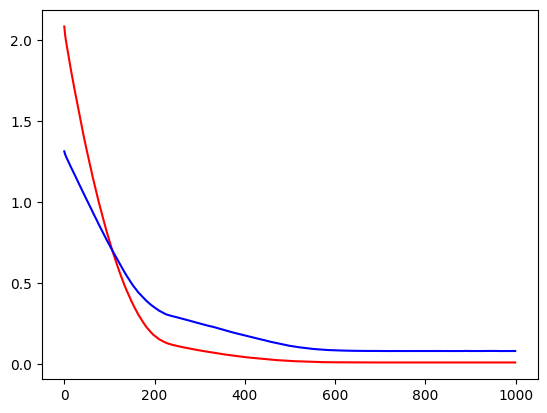

In [69]:
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['mae'], 'b')

In [70]:
# 7. 모델 사용
model2.predict(np.array([[-0.01],
                        [0],[0.01],[0.02]]))

1/1 [==============================] - 0s 28ms/step


array([[0.28847292],
       [0.30649456],
       [0.3245162 ],
       [0.34253782]], dtype=float32)

In [71]:
y_hat = model2.predict([scaled_data_C])
for h,y in zip(y_hat[::20], noised_scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 1ms/step
[0.30649456] 0.15019267937613884
[0.6669272] 0.7004537719972188
[1.02736] 1.1166743914140105
[1.3877927] 1.4465081669737014
[1.7482253] 1.6774487279438506


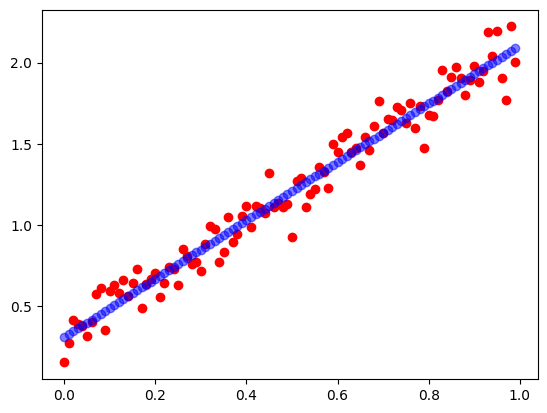

In [72]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='r')
plt.scatter(x=scaled_data_C, y=y_hat, c='b', alpha=0.5)

In [74]:
# 모델 저장
model2.save('model/noise_after_learning.h5')
# from tensorflow.keras.models import save_model
# save_model(model2, 'model/noise_after_learning.h5')
# save_model(model2, 'model/noise_after_learning.keras')

In [75]:
# 저장된 모델 사용하기
from tensorflow.keras.models import load_model
model3 = load_model('model/noise_after_learning.h5')

In [76]:
model3.predict(np.array([[-0.01],[0],[0.01],[0.02]]))

1/1 [==============================] - 0s 33ms/step


array([[0.28847292],
       [0.30649456],
       [0.3245162 ],
       [0.34253782]], dtype=float32)